In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression

In [5]:
df=pd.read_csv("C:\\Users\\91976\\Documents\\DVUP\\Dataset\\gdpWorld.csv",decimal=',')
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [7]:
df.isnull()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
223,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,True,True,True,True,False
224,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
225,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [9]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [10]:
col=pd.Series(df.columns.values)
col

0                                Country
1                                 Region
2                             Population
3                         Area (sq. mi.)
4             Pop. Density (per sq. mi.)
5           Coastline (coast/area ratio)
6                          Net migration
7     Infant mortality (per 1000 births)
8                     GDP ($ per capita)
9                           Literacy (%)
10                     Phones (per 1000)
11                            Arable (%)
12                             Crops (%)
13                             Other (%)
14                               Climate
15                             Birthrate
16                             Deathrate
17                           Agriculture
18                              Industry
19                               Service
dtype: object

In [11]:
for i in col:
    if df[i].isnull().sum() !=0:
        df[i].fillna(df[i].median(), inplace=True)

In [12]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

<AxesSubplot:>

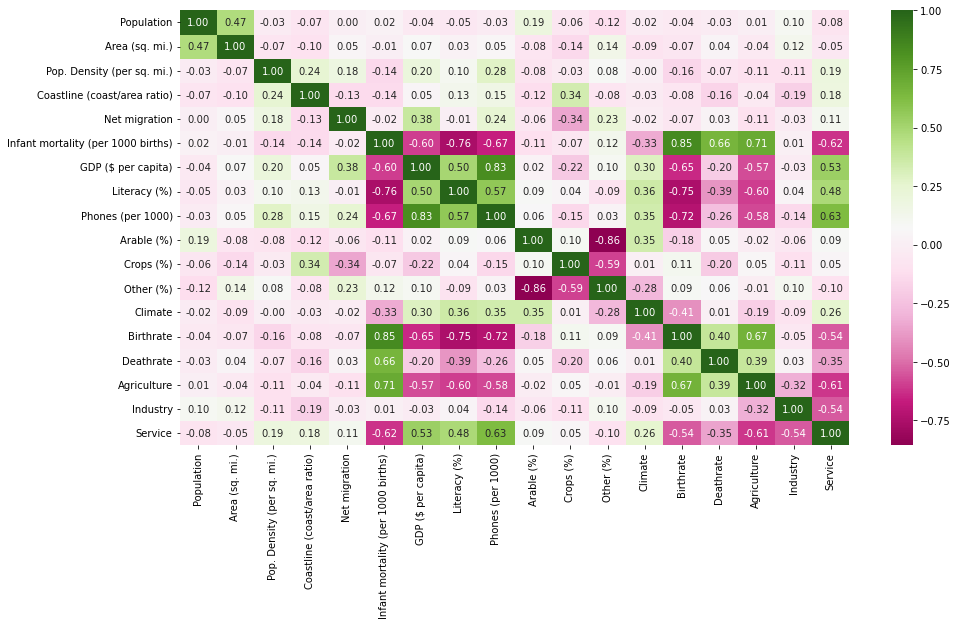

In [13]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.iloc[:,2:].corr() , fmt='.2f', annot=True , cmap='PiYG')

In [14]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [15]:
factors_affecting=['Infant mortality (per 1000 births)' ,'Phones (per 1000)','Birthrate','Agriculture','Service','Literacy (%)']
factors_affecting

['Infant mortality (per 1000 births)',
 'Phones (per 1000)',
 'Birthrate',
 'Agriculture',
 'Service',
 'Literacy (%)']

In [16]:
X=df[factors_affecting]
X.describe()

,Infant mortality (per 1000 births),Phones (per 1000),Birthrate,Agriculture,Service,Literacy (%)
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,35.315242,235.006608,22.070793,0.147419,0.565661,83.604405
std,35.193412,226.103017,11.108805,0.142429,0.160249,19.100523
min,2.290000,0.200000,7.290000,0.000000,0.062000,17.600000
25%,8.215000,38.500000,12.725000,0.040000,0.443500,76.400000
50%,21.000000,176.200000,18.790000,0.099000,0.571000,92.500000
75%,55.335000,382.900000,29.770000,0.211000,0.671500,97.800000
max,191.190000,1035.600000,50.730000,0.769000,0.954000,100.000000


In [17]:
Y=df['GDP ($ per capita)']
Y.describe()

count      227.000000
mean      9671.585903
std      10030.645350
min        500.000000
25%       1900.000000
50%       5550.000000
75%      15700.000000
max      55100.000000
Name: GDP ($ per capita), dtype: float64

In [18]:
X_train, X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.35,random_state=0)

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(227, 6) (147, 6) (80, 6)


In [20]:
print(Y.shape,Y_train.shape,Y_test.shape)

(227,) (147,) (80,)


In [21]:
non_linear= DecisionTreeRegressor(max_depth = 2, random_state = 0)
non_linear.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [22]:
training_data_accuracy=non_linear.score(X_train,Y_train)
print("Training data accuracy for Linear regression= ",training_data_accuracy)

Training data accuracy for Linear regression=  0.8005977527418291


In [23]:
testing_data_accuracy=non_linear.score(X_test,Y_test)
print("Testing data accuracy for Linear regression= ",testing_data_accuracy)

Testing data accuracy for Linear regression=  0.6851407441330348


In [24]:
linear=LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression()

In [25]:
testing_data_accuracy=linear.score(X_test,Y_test)
print("Testing data accuracy for Linear regression= ",testing_data_accuracy)

Testing data accuracy for Linear regression=  0.7172382435789677
